In [2]:
import pandas as pd

df = pd.read_csv("insurance_data.csv")
df.head(5)

,Age,Purchased
0,56,1
1,46,1
2,32,0
3,25,0
4,38,1


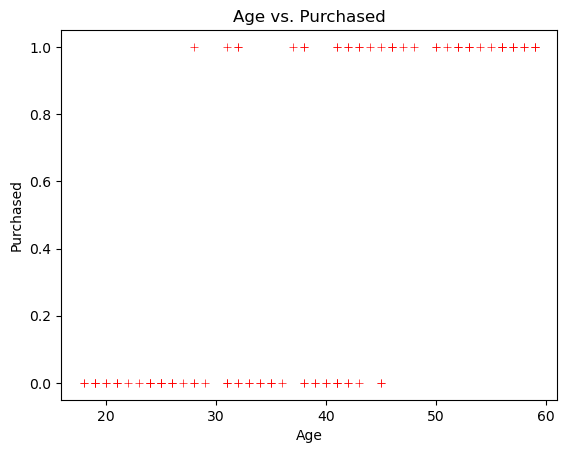

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = "Age", y = "Purchased", marker = "+", color = 'red', data = df)
plt.title("Age vs. Purchased")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

In [7]:
X = df[["Age"]]
y = df.Purchased

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20 ,random_state = 42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [11]:
model.predict([[38]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [12]:
model.score(X,y)

0.86

In [13]:
model.predict([[32]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


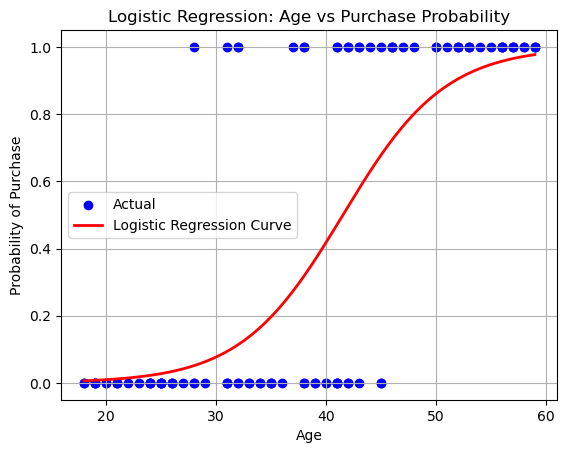

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create a smooth range of age values for plotting the sigmoid curve
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300).reshape(-1, 1)
predicted_probs = model.predict_proba(age_range)[:, 1]  # probabilities for class 1 (Purchased)

# Plot original data points
plt.scatter(df['Age'], df['Purchased'], color='blue', label='Actual')

# Plot the logistic regression sigmoid curve
plt.plot(age_range, predicted_probs, color='red', linewidth=2, label='Logistic Regression Curve')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression: Age vs Purchase Probability')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

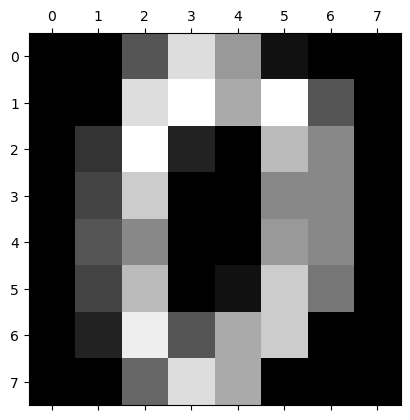

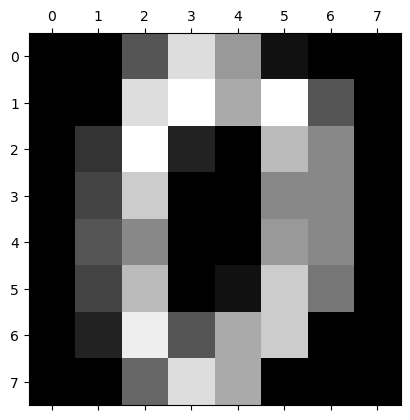

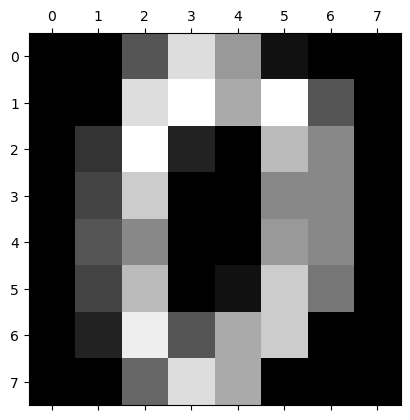

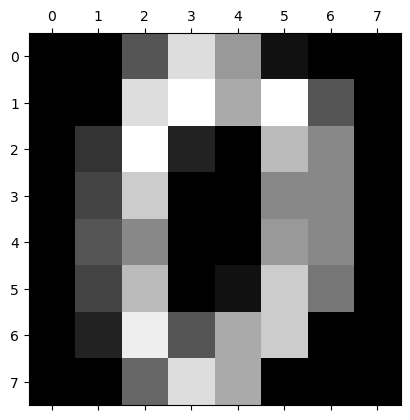

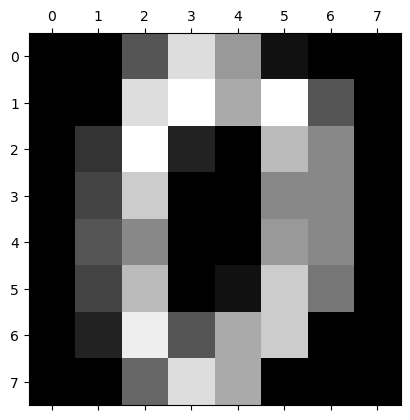

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[0])

In [9]:
digits.target[ 0: 5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(digits.data, digits.target , test_size = 0.20, random_state = 42)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [15]:
model.score(xtest,ytest)

0.9722222222222222

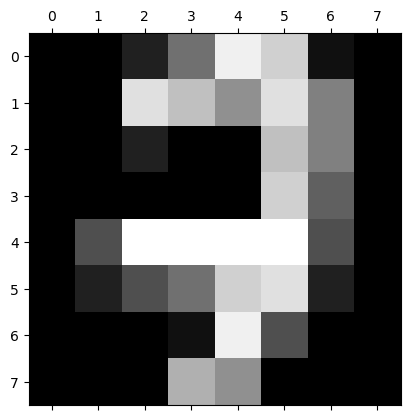

In [18]:
plt.matshow(digits.images[86])

In [19]:
digits.target[86]

7

In [21]:
model.predict([digits.data[86]])

array([7])

In [23]:
model.predict(digits.data[0 : 5])

array([0, 1, 2, 3, 4])

In [25]:
y_predicted = model.predict(xtest)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

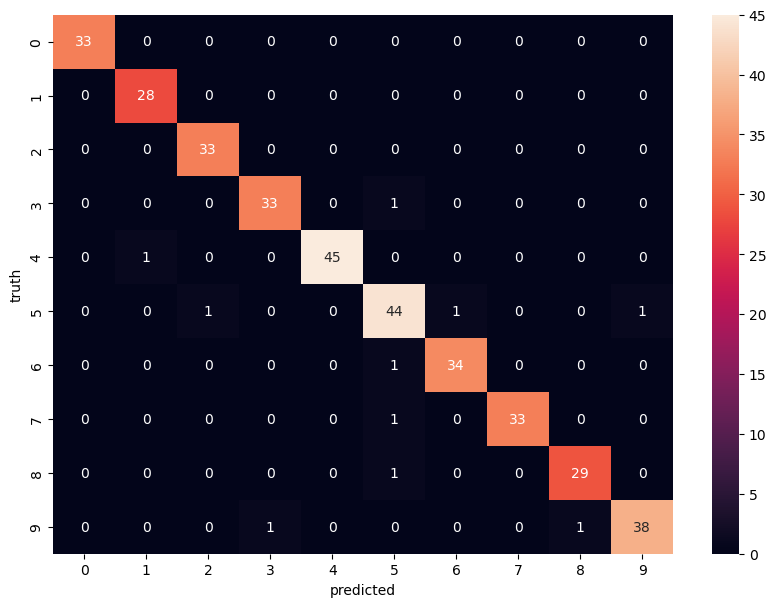

In [27]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm , annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")